## Check more details about image blending
https://docs.opencv.org/3.4/dc/dff/tutorial_py_pyramids.html

The sample code shows the left/right combination of apple and orange. The sample code creates 6-level Gaussian Pyramid and Laplacian Pyramid. Please see the detail comments of the implementation below.

## TO DO:
*   Define different combinations of apple and orange. For example, upper part of apple and bottom part of orange. Try any possible combinations.



In [1]:
## to access the google drive with the google account
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


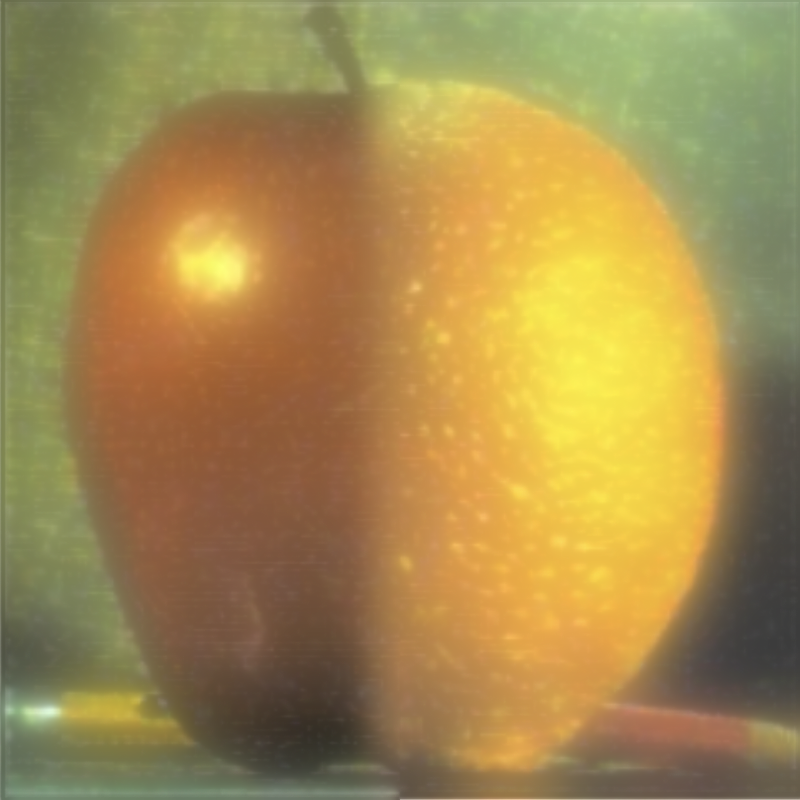

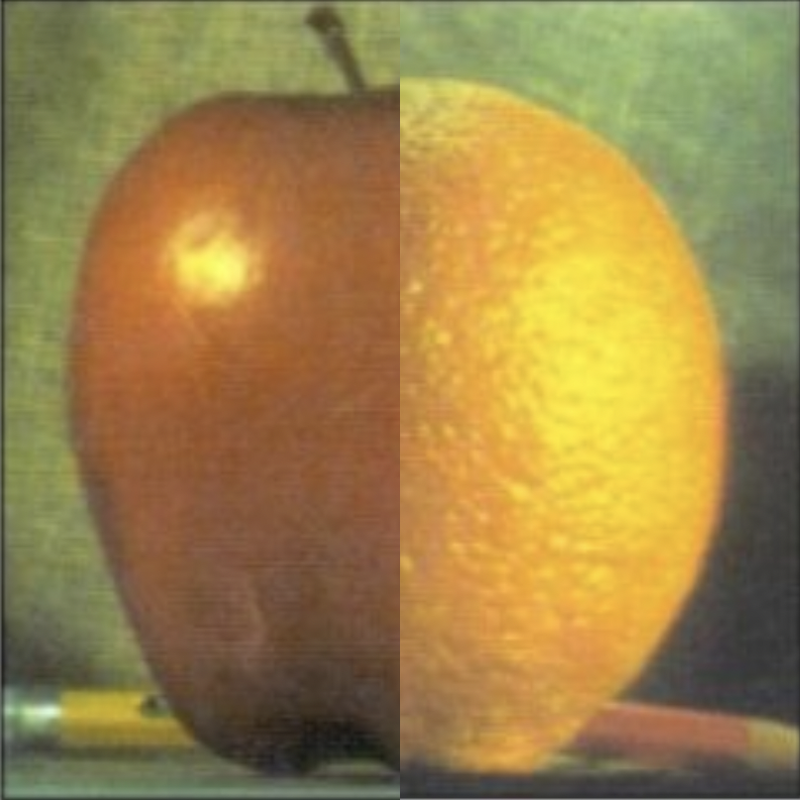

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow # for image display


img_path = '/content/drive/My Drive/Colab Notebooks/Assignment1/Part2/'

A = cv.imread(img_path+'apple.png')
B = cv.imread(img_path+'orange.png')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)


# Now add left and right halves of images in each level
## This can be played with different combination.
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]

for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])

cv2_imshow(ls_)
print('\n')
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

cv2_imshow(real)

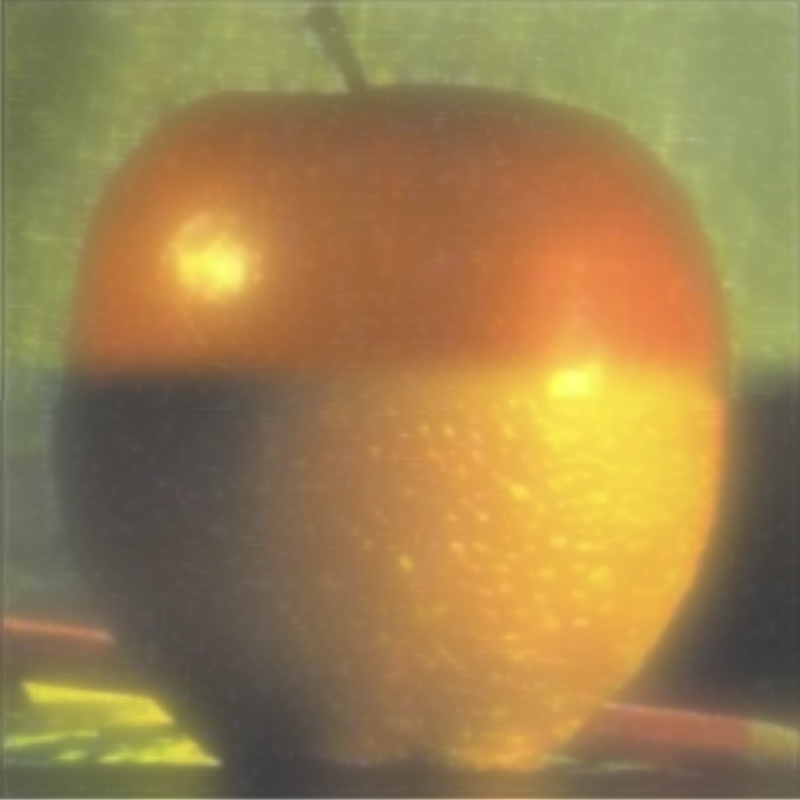

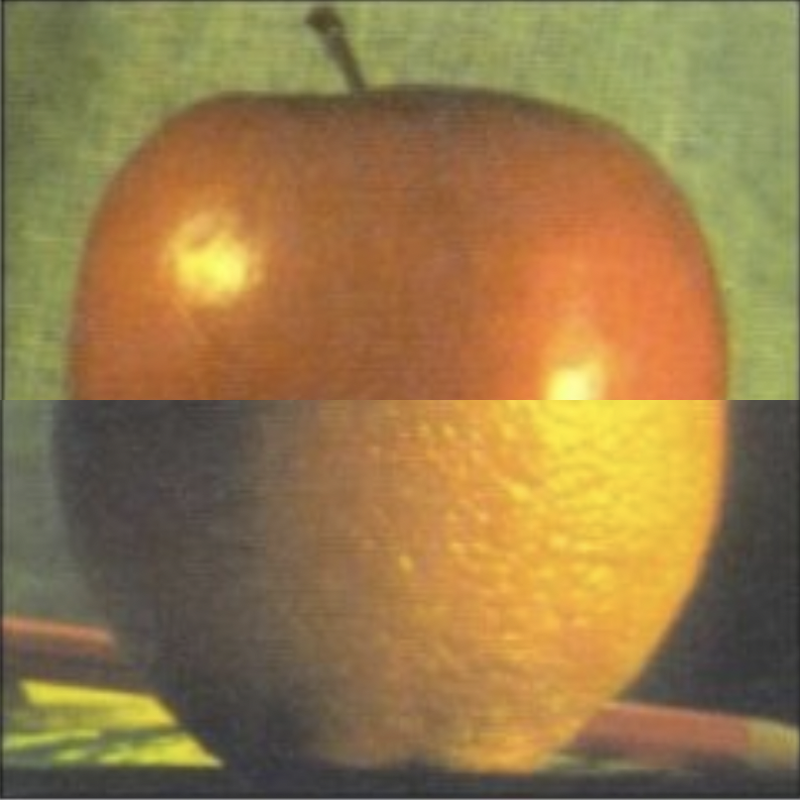

In [8]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow # for image display


img_path = '/content/drive/My Drive/Colab Notebooks/Assignment1/Part2/'

A = cv.imread(img_path+'apple.png')
B = cv.imread(img_path+'orange.png')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)


# Now add left and right halves of images in each level
## This can be played with different combination.
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.vstack((la[0:rows//2, :], lb[rows//2:, :]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]

for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.resize(ls_, (LS[i].shape[1], LS[i].shape[0]))
    ls_ = cv.add(ls_, LS[i])

cv2_imshow(ls_)
print('\n')
# image with direct connecting each half
real = np.vstack((A[0:rows//2, :],B[rows//2:, :]))

cv2_imshow(real)

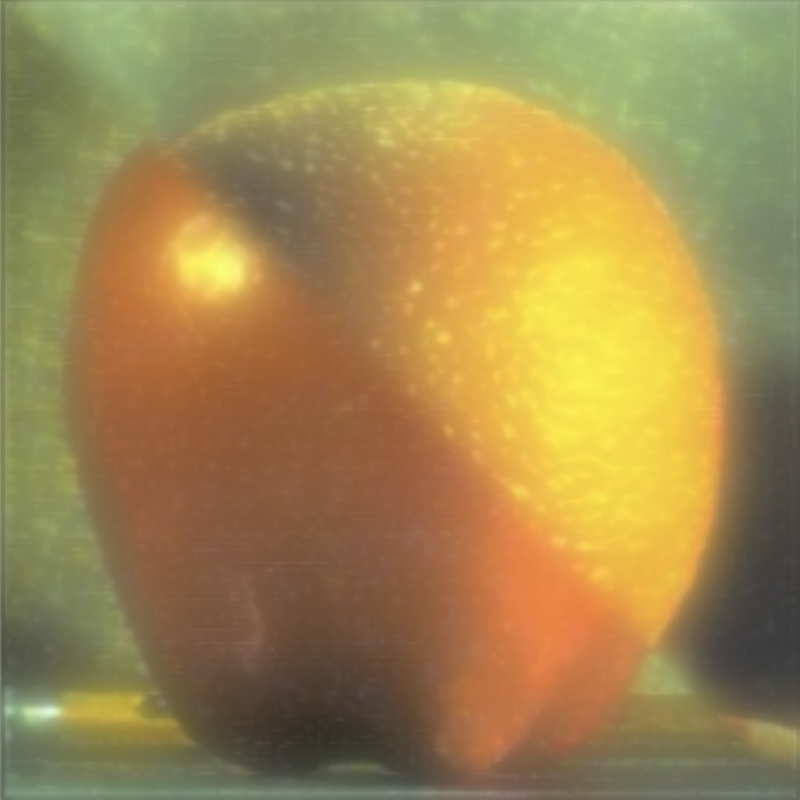

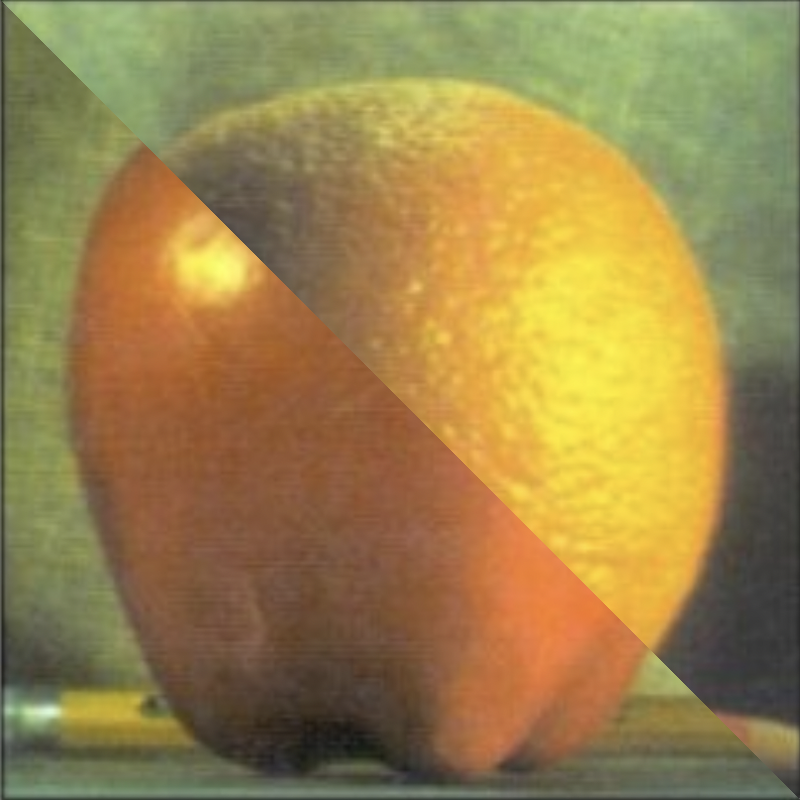

In [16]:

G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)

G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)

lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)

lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)
LS = []
for la, lb in zip(lpA, lpB):
    rows, cols, dpt = la.shape


    mask_upper = np.tri(rows, cols, dtype=np.uint8)
    mask_lower = 1 - mask_upper


    upper_half_A = cv.bitwise_and(la, la, mask=mask_upper)
    lower_half_B = cv.bitwise_and(lb, lb, mask=mask_lower)

    # 将 A 的上半部分和 B 的下半部分组合
    ls = cv.add(upper_half_A, lower_half_B)
    LS.append(ls)


ls_ = LS[0]
for i in range(1, 6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.resize(ls_, (LS[i].shape[1], LS[i].shape[0]))
    ls_ = cv.add(ls_, LS[i])


cv2_imshow(ls_)

rows, cols, _ = A.shape
mask_upper = np.tri(rows, cols, dtype=np.uint8)
mask_lower = 1 - mask_upper

upper_half_A = cv.bitwise_and(A, A, mask=mask_upper)
lower_half_B = cv.bitwise_and(B, B, mask=mask_lower)

real = cv.add(upper_half_A, lower_half_B)
cv2_imshow(real)